In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
%matplotlib inline
import numpy as np

df = pd.concat(pd.read_excel("Dados/202001.xlsx", sheet_name=None), ignore_index=True)
#df.set_index('Data',inplace=True)
df = df.dropna(axis="columns")
df = df.rename(columns={"Tipo   Lançamento  Nr. Ordem\nAbast." : "Tipo", "Tipo" : "Tipo Nota Fiscal","Unnamed: 4" : "Lançamento", "Exerc. Empenho" : "Exerc.", "Unnamed: 8" : "Empenho", "Unnamed: 10" : "Nr Litros", "Valor        Numero Abast." : "Valor Abast.", "Unnamed: 15" : "Valor Ajustado", "Exerc..1" : "Exerc."})
df = df.drop(["Lançamento", "Exerc.", "Empenho", "Tipo Nota Fiscal", "Serie", "Valor Ajustado", "EQAL", "Liquidação"], axis = 1)
df["Produto"] = df["Produto"].replace("ÁLCOOL COMBUSTÍVEL (ETANOL)", "ETANOL")
df["Produto"] = df["Produto"].replace("ÓLEO DIESEL S-10", "DIESEL")
df["Produto"] = df["Produto"].replace("GASOLINA COMUM", "GASOLINA")
df['Valor Abast.'] = df['Valor Abast.'].str.replace(" ","")
df["Valor Abast."] = df["Valor Abast."].str.replace(",", ".")
df["Valor Abast."] = pd.to_numeric(df["Valor Abast."], errors="ignore")
df["Valor Abast."] = df["Valor Abast."].astype(float)
df["Valor Abast."] = df["Valor Abast."].round(2)
df

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
0,2020-01-02,87017,EQU-8717,Consum,GASOLINA,45.000,202.06
1,2020-01-02,31093,AZL-3509,Abast,DIESEL,193.510,752.76
2,2020-01-02,79466,BCD-6527,Abast,ETANOL,46.040,151.48
3,2020-01-02,79473,AJU-6529,Abast,DIESEL,48.041,186.89
4,2020-01-02,79472,BCG-4255,Abast,DIESEL,32.799,127.60
...,...,...,...,...,...,...,...
262,2020-01-31,79467,BCD-6528,Abast,ETANOL,35.240,115.95
263,2020-01-31,79466,BCD-6527,Abast,ETANOL,31.331,103.09
264,2020-01-31,79463,BCD-6524,Abast,ETANOL,47.249,155.46
265,2020-01-31,79468,BCD-6529,Abast,ETANOL,47.869,157.50


In [131]:
df["Produto"].value_counts()

ETANOL      134
GASOLINA     82
DIESEL       51
Name: Produto, dtype: int64

In [132]:
df["Produto"].value_counts(normalize=True)

ETANOL      0.501873
GASOLINA    0.307116
DIESEL      0.191011
Name: Produto, dtype: float64

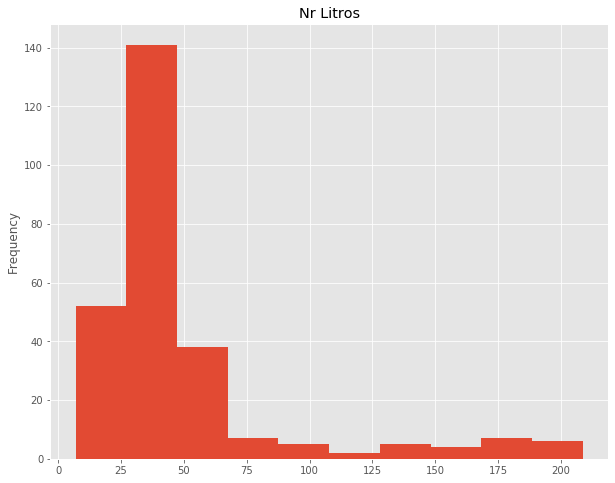

In [133]:
#Ploting
plt.rcParams.update({'font.size': 10, 'figure.figsize': (10, 8)})
#Gráfico de barras em relação ao número de litros
df["Nr Litros"].plot(kind='hist', title="Nr Litros")

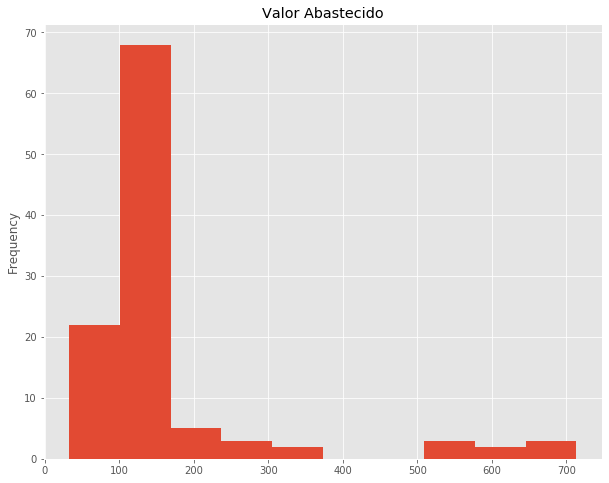

In [134]:
df["Valor Abast."].plot(kind='hist', title = "Valor Abastecido")

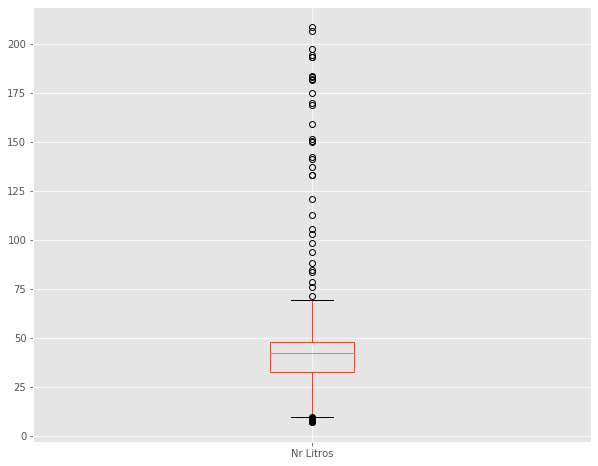

In [135]:
df["Nr Litros"].plot(kind="box")

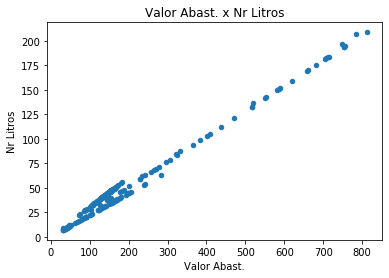

In [5]:
df.plot(kind='scatter', x = "Valor Abast.", y="Nr Litros", title="Valor Abast. x Nr Litros")

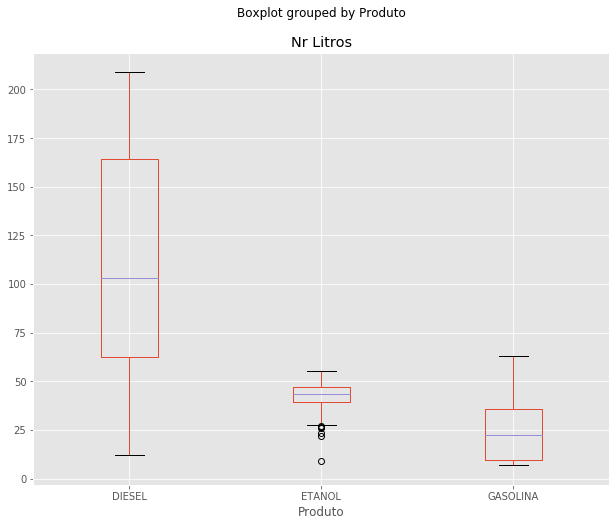

In [137]:
df.boxplot(column="Nr Litros", by="Produto")

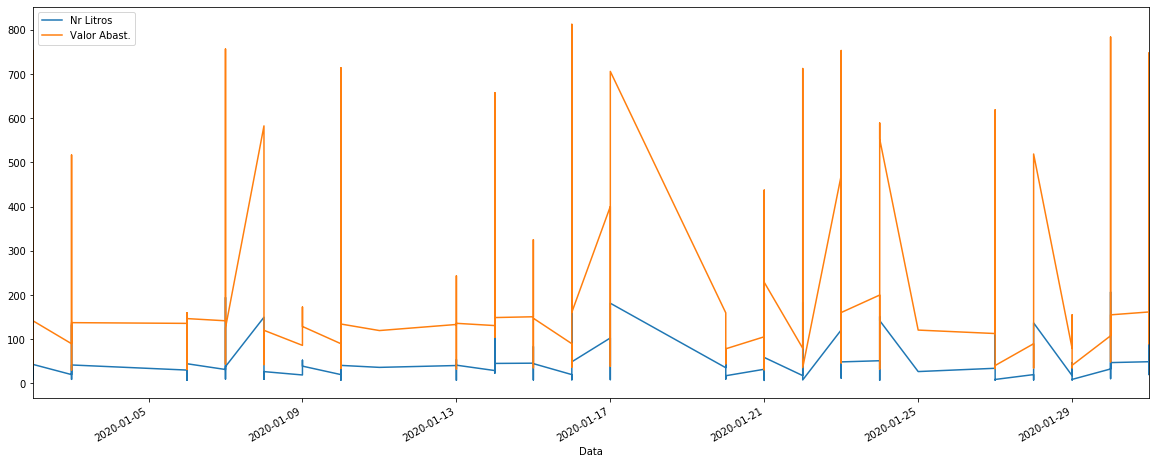

In [6]:
plt.rcParams.update({'font.size': 10, 'figure.figsize': (20, 8)})
ax = plt.gca()
df.plot(kind='line', x = "Data", y = "Nr Litros", ax=ax)
df.plot(kind='line', x = "Data", y = "Valor Abast.", ax=ax)

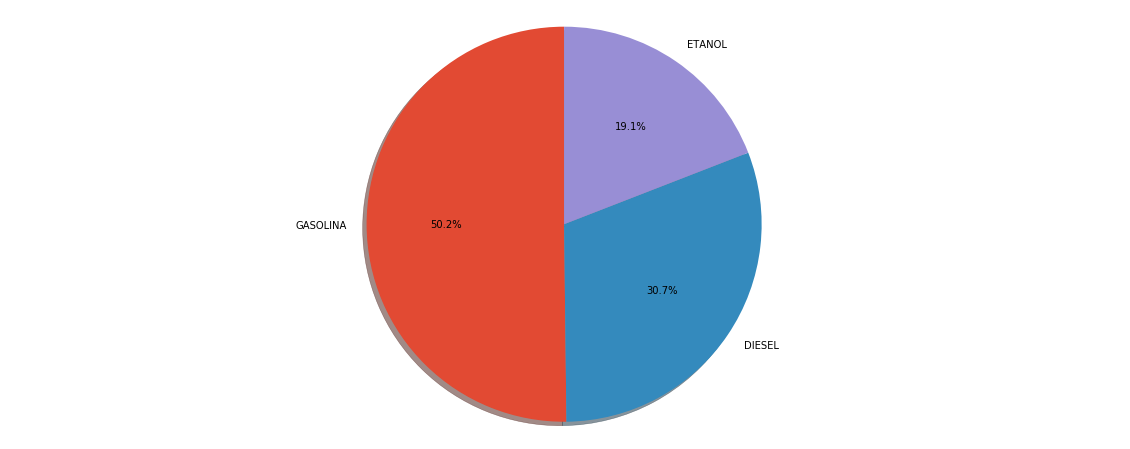

In [139]:
labels = df["Produto"].unique()
sizes = df["Produto"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

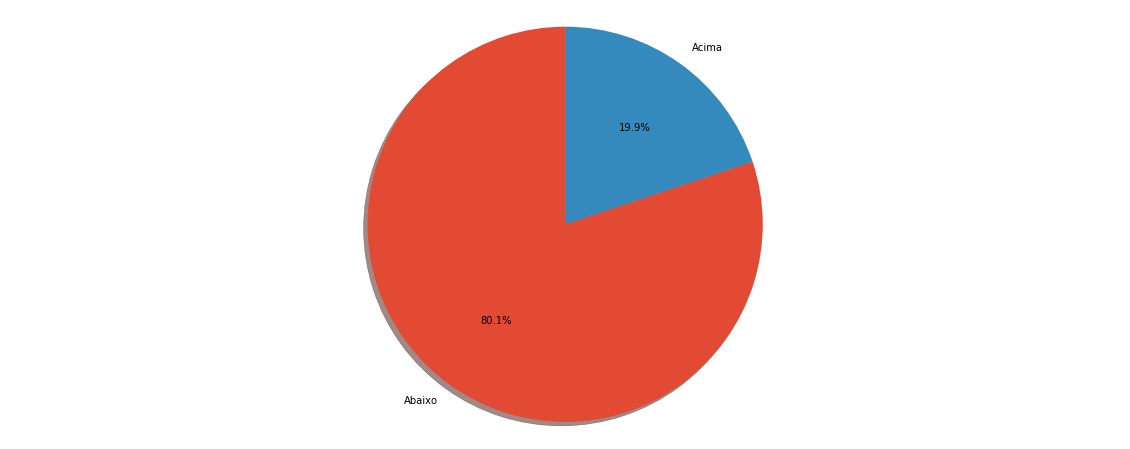

In [140]:
labels = ["Abaixo", "Acima"]
teste = df["Nr Litros"] >= df["Nr Litros"].mean()
sizes = teste.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

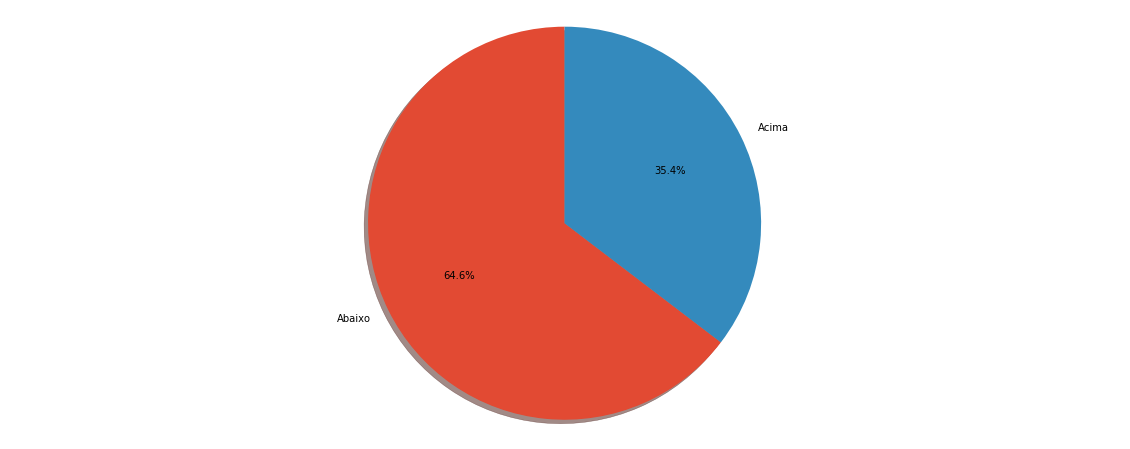

In [141]:
labels = ["Abaixo", "Acima"]
teste = df["Placa"].value_counts() >= df["Placa"].value_counts().mean()
sizes = teste.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

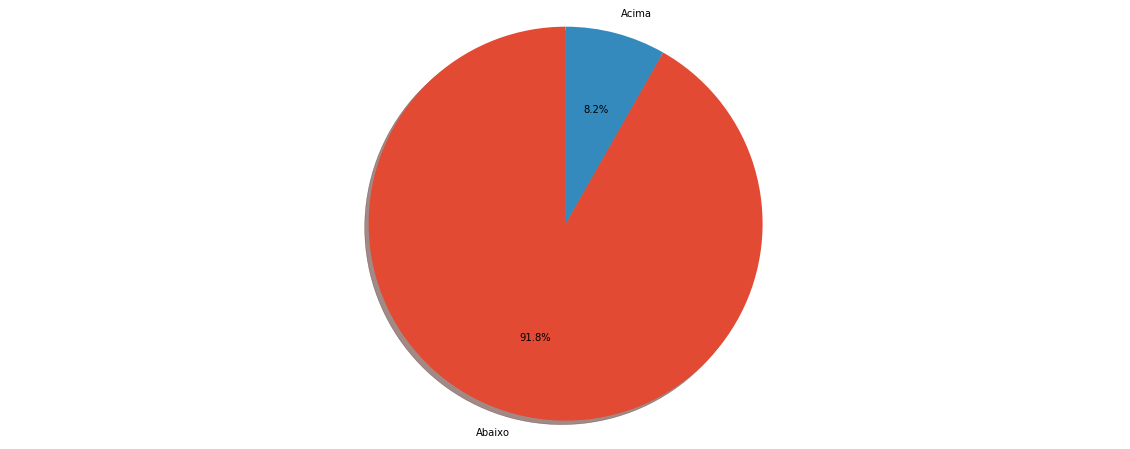

In [142]:
labels = ["Abaixo", "Acima"]
teste = df["Valor Abast."] >= df["Valor Abast."].mean()
sizes = teste.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

C:\Users\Lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


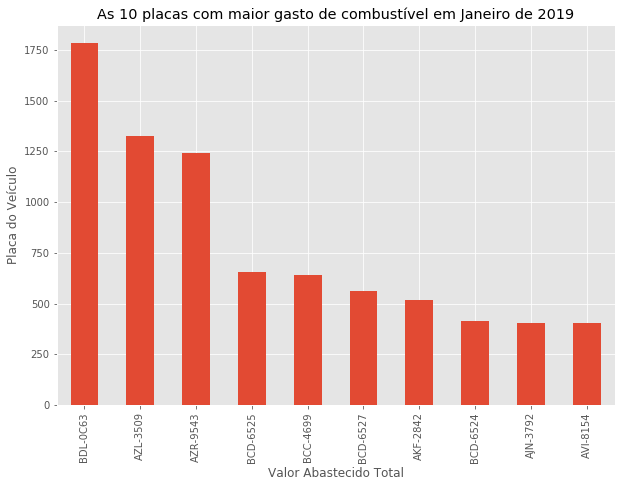

In [147]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, ax = plt.subplots(figsize=(10, 7))

#format the currency
#def currency(x, pos):
#    'The two args are the value and tick position'
#    if x >= 1000000:
#        return '${:1.1f}M'.format(x*1e-6)
#    return 'R${:1.1f}K'.format(x*1e-3)

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Placa", ax=ax)
avg = top_10['Valor Abastecido'].mean()

#set limits and labels
ax.set(title='As 10 placas com maior gasto de combustível em Janeiro de 2019', xlabel='Valor Abastecido Total', ylabel='Placa do Veículo')
#formatter = FuncFormatter(currency)
#ax.xaxis.set_major_formatter(formatter)
#add a line for the average
ax.axvline(x = avg, color='b', label='Média', linestyle='--', linewidth=1)

#annotate the values over the average
#for placa in [0, 1, 2]:
#    ax.text(100, placa, "Acima da média")
    
#hide the legend
ax.legend().set_visible(False)

C:\Users\Lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


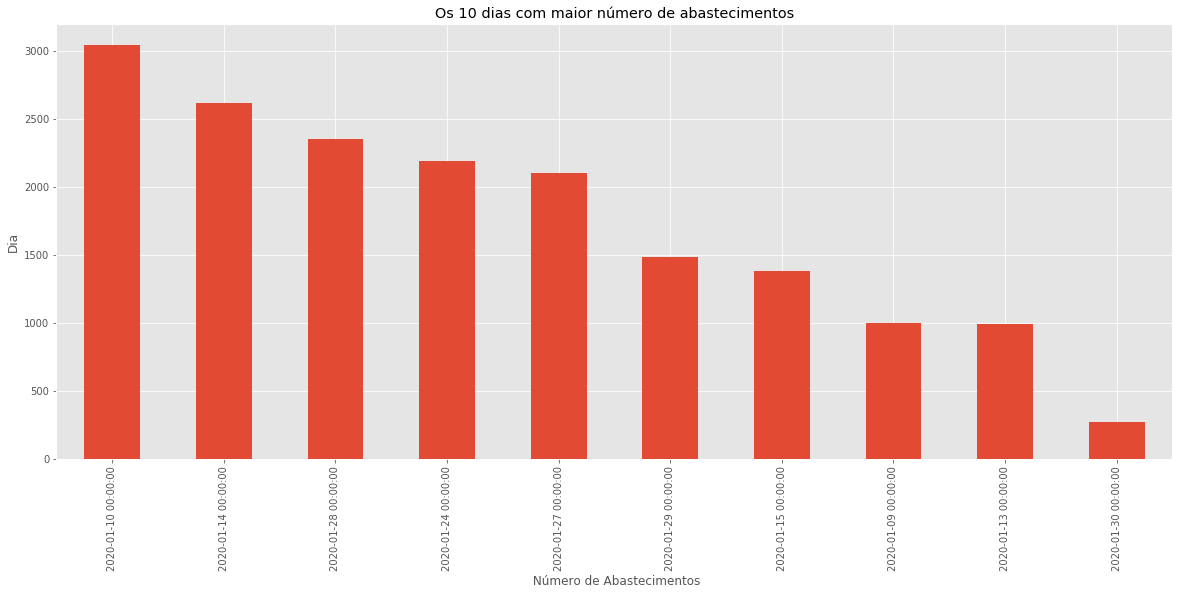

In [144]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Data')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Data': 'Data', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, ax = plt.subplots()

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Data", ax=ax)
avg = top_10['Valor Abastecido'].mean()

#set limits and labels
ax.set(title='Os 10 dias com maior número de abastecimentos', xlabel=' Número de Abastecimentos', ylabel='Dia')

#hide the legend
ax.legend().set_visible(False)

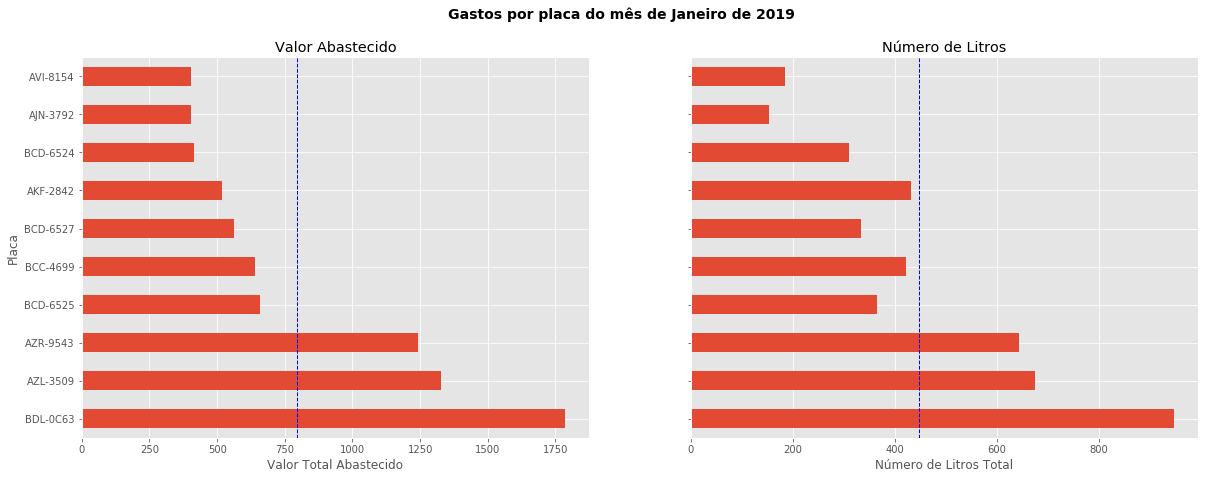

In [148]:
#get the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(20, 7))
top_10.plot(kind='barh', y="Valor Abastecido", x="Placa", ax=ax0)
ax0.set(title='Valor Abastecido', xlabel='Valor Total Abastecido', ylabel='Placa')

#plot the average as a vertical line
avg = top_10['Valor Abastecido'].mean()
ax0.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#repeat for the Nr Litros plot
top_10.plot(kind='barh', y="Número de Litros", x="Placa", ax=ax1)
avg = top_10['Número de Litros'].mean()
ax1.set(title='Número de Litros', xlabel='Número de Litros Total', ylabel='')
ax1.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#title the figure
fig.suptitle('Gastos por placa do mês de Janeiro de 2019', fontsize=14, fontweight='bold')

#hide the legend
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

C:\Users\Lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


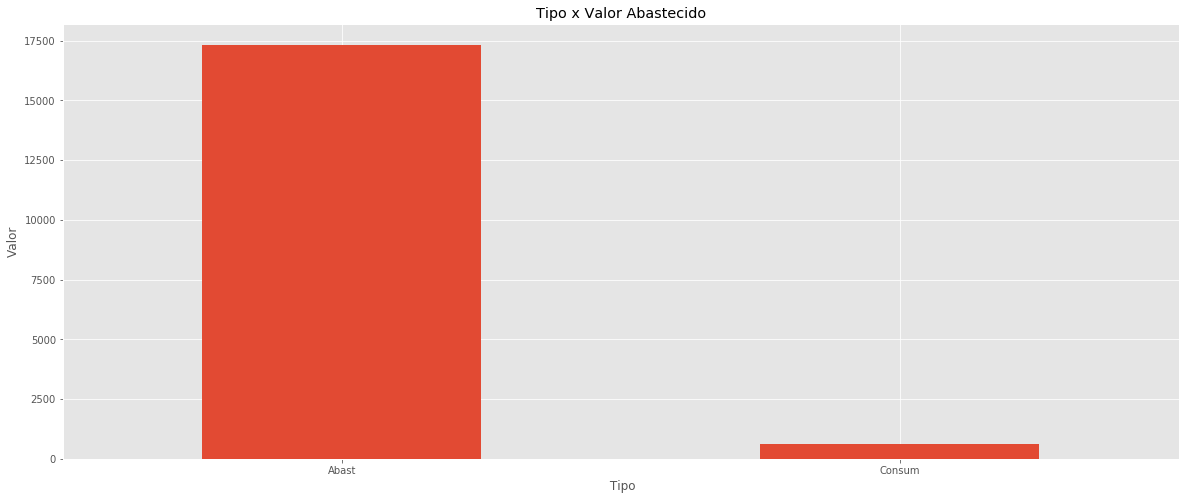

In [149]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Tipo')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Tipo': 'Tipo', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, ax = plt.subplots()

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Tipo", rot = 0, ax=ax)
avg = top_10['Valor Abastecido'].mean()

#set limits and labels
ax.set(title='Tipo x Valor Abastecido', xlabel=' Tipo', ylabel='Valor')

#hide the legend
ax.legend().set_visible(False)

C:\Users\Lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


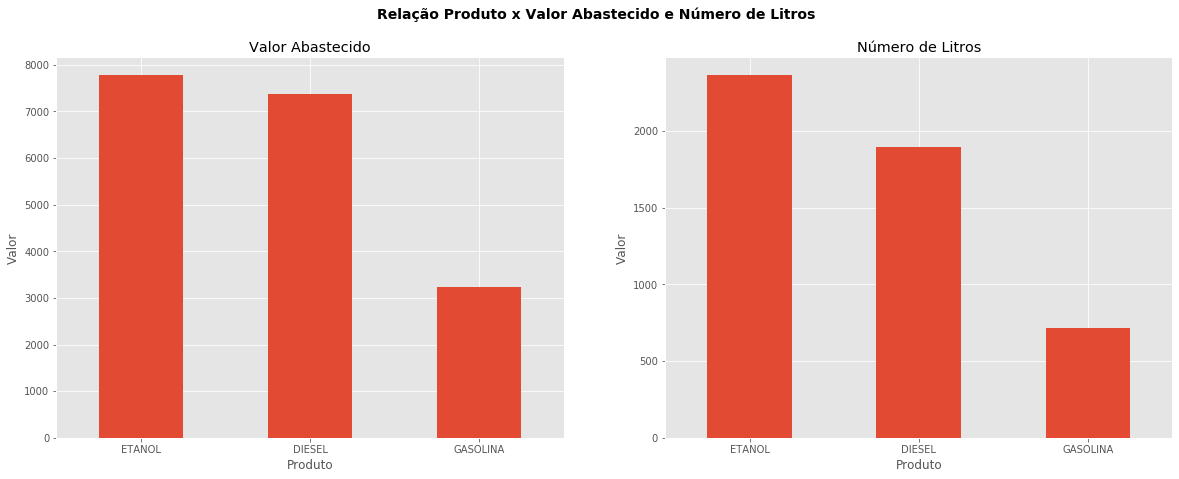

In [117]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Produto')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Produto': 'Produto', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(20, 7))

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Produto", rot = 0, ax=ax0)
#set limits and labels
ax0.set(title='Valor Abastecido', xlabel='Produto', ylabel='Valor')

#plot the data and get the average
top_10.plot(kind='bar', y = "Número de Litros", x ="Produto", rot = 0, ax=ax1)
#set limits and labels
ax1.set(title='Número de Litros', xlabel='Produto', ylabel='Valor')

#title the figure
fig.suptitle('Relação Produto x Valor Abastecido e Número de Litros', fontsize=14, fontweight='bold')

#hide the legend
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)

C:\Users\Lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


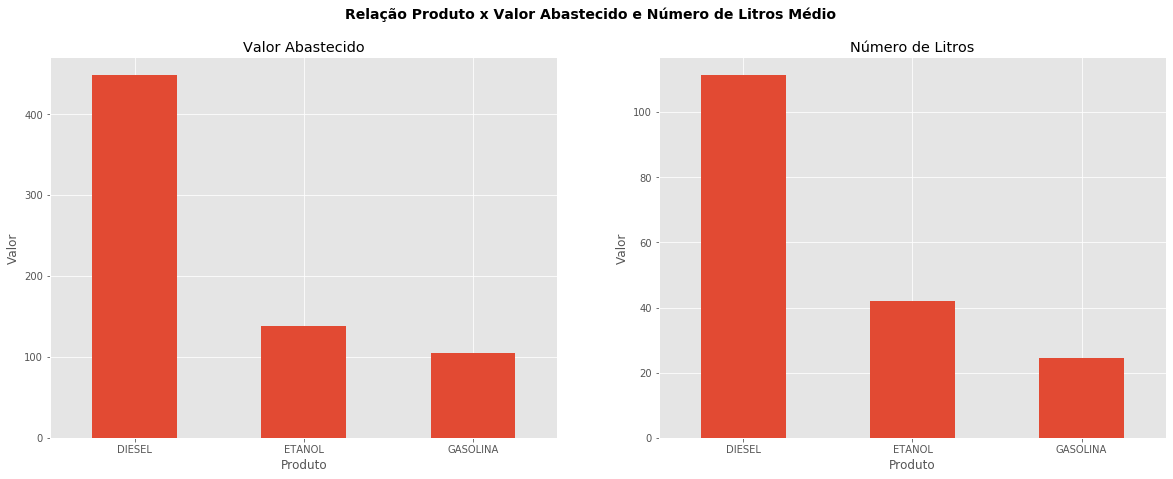

In [150]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Produto')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'mean', 'Nr Litros': 'mean'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Produto': 'Produto', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(20, 7))

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Produto", rot = 0, ax=ax0)
#set limits and labels
ax0.set(title='Valor Abastecido', xlabel='Produto', ylabel='Valor')

#plot the data and get the average
top_10.plot(kind='bar', y = "Número de Litros", x ="Produto", rot = 0, ax=ax1)
#set limits and labels
ax1.set(title='Número de Litros', xlabel='Produto', ylabel='Valor')

#title the figure
fig.suptitle('Relação Produto x Valor Abastecido e Número de Litros Médio', fontsize=14, fontweight='bold')

#hide the legend
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)

C:\Users\Lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


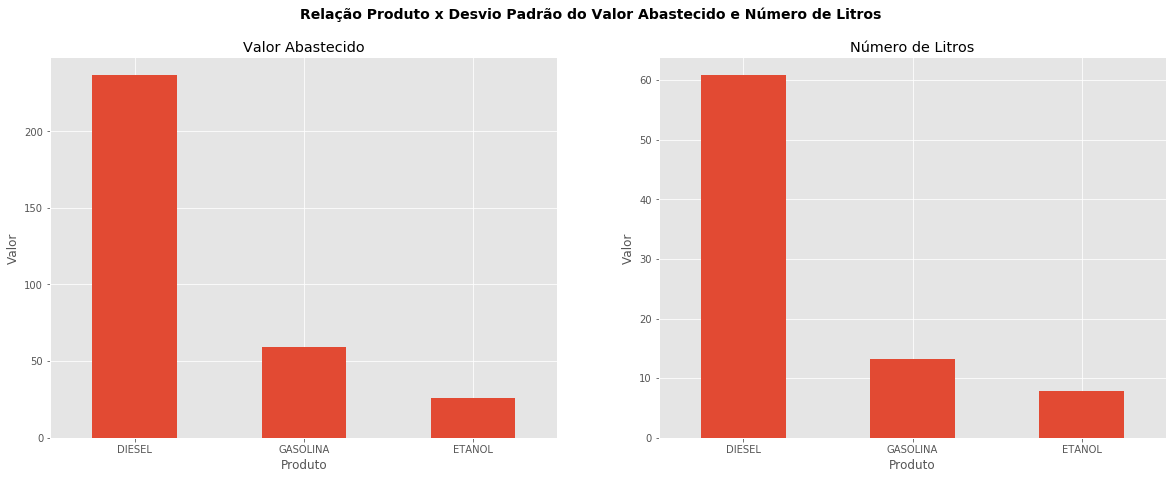

In [119]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Produto')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'std', 'Nr Litros': 'std'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Produto': 'Produto', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(20, 7))

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Produto", rot = 0, ax=ax0)
#set limits and labels
ax0.set(title='Valor Abastecido', xlabel='Produto', ylabel='Valor')

#plot the data and get the average
top_10.plot(kind='bar', y = "Número de Litros", x ="Produto", rot = 0, ax=ax1)
#set limits and labels
ax1.set(title='Número de Litros', xlabel='Produto', ylabel='Valor')

#title the figure
fig.suptitle('Relação Produto x Desvio Padrão do Valor Abastecido e Número de Litros', fontsize=14, fontweight='bold')

#hide the legend
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)